In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df_users = pd.read_csv('users.csv')
df_submissions = pd.read_csv('submissions.csv', sep=';')

C:\Users\dti Digital\AppData\Local\Temp\ipykernel_24772\418787582.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv('users.csv')


In [146]:
df_users = df_users.rename(columns={'rating': 'userRating'})
df_submissions = df_submissions.rename(columns={'rating': 'problemRating'})

In [147]:
df_users = df_users.dropna(subset=['handle'], ignore_index=True)

### Users Analysis

In [148]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653213 entries, 0 to 653212
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   handle                   653213 non-null  object 
 1   email                    21280 non-null   object 
 2   vkId                     1012 non-null    float64
 3   openId                   104 non-null     object 
 4   firstName                140412 non-null  object 
 5   lastName                 129875 non-null  object 
 6   country                  183276 non-null  object 
 7   city                     143838 non-null  object 
 8   organization             142846 non-null  object 
 9   contribution             653213 non-null  int64  
 10  rank                     653134 non-null  object 
 11  userRating               653134 non-null  float64
 12  maxRank                  653134 non-null  object 
 13  maxRating                653134 non-null  float64
 14  last

In [149]:
df_users.head()

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,rank,userRating,maxRank,maxRating,lastOnlineTimeSeconds,registrationTimeSeconds,friendOfCount,avatar,titlePhoto
0,------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aktobe KTL,0,newbie,1172.0,pupil,1399.0,1601121531,1451119991,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
1,----------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pupil,1370.0,pupil,1370.0,1583237730,1555168540,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
2,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pupil,1322.0,specialist,1423.0,1620821408,1575083367,0,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
3,---------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,newbie,783.0,pupil,1367.0,1600105080,1527792619,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
4,----------,NaN,NaN,NaN,Fedor,Ushakov,NaN,NaN,NaN,0,master,2188.0,international master,2320.0,1699555096,1458406661,187,https://userpic.codeforces.org/399686/avatar/5...,https://userpic.codeforces.org/399686/title/17...


### Submissions Analysis

In [150]:
df_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618828 entries, 0 to 10618827
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   handle               object 
 1   contestId            float64
 2   index                object 
 3   points               float64
 4   problemRating        float64
 5   tags                 object 
 6   id                   int64  
 7   programmingLanguage  object 
 8   verdict              object 
dtypes: float64(3), int64(1), object(5)
memory usage: 729.1+ MB


In [151]:
df_submissions.dropna(subset=['problemRating']).head()

,handle,contestId,index,points,problemRating,tags,id,programmingLanguage,verdict
5,---0_0---,1989.0,D,NaN,1900.0,"['brute force', 'data structures', 'dp', 'gree...",267801857,C++20 (GCC 13-64),TIME_LIMIT_EXCEEDED
6,---0_0---,1989.0,D,NaN,1900.0,"['brute force', 'data structures', 'dp', 'gree...",267801070,C++20 (GCC 13-64),TIME_LIMIT_EXCEEDED
7,---0_0---,1989.0,B,NaN,1200.0,"['brute force', 'greedy', 'strings']",267745338,C++20 (GCC 13-64),OK
8,---0_0---,1989.0,C,NaN,1400.0,['greedy'],267734813,C++20 (GCC 13-64),OK
9,---0_0---,1989.0,C,NaN,1400.0,['greedy'],267723621,C++20 (GCC 13-64),WRONG_ANSWER


In [152]:
verdicts = df_submissions['verdict'].value_counts()
verdicts

verdict
OK                         4770061
WRONG_ANSWER               4310834
TIME_LIMIT_EXCEEDED         681345
RUNTIME_ERROR               300189
COMPILATION_ERROR           282141
SKIPPED                     100075
MEMORY_LIMIT_EXCEEDED        86849
PARTIAL                      58342
IDLENESS_LIMIT_EXCEEDED      15749
CHALLENGED                   12827
REJECTED                       268
PRESENTATION_ERROR              53
CRASHED                         48
FAILED                          47
Name: count, dtype: int64

Below we show the proportion between the number of valid submissions and the total number of submissions.

In [153]:
verdicts['OK'] / verdicts.sum()

0.44920785985044676

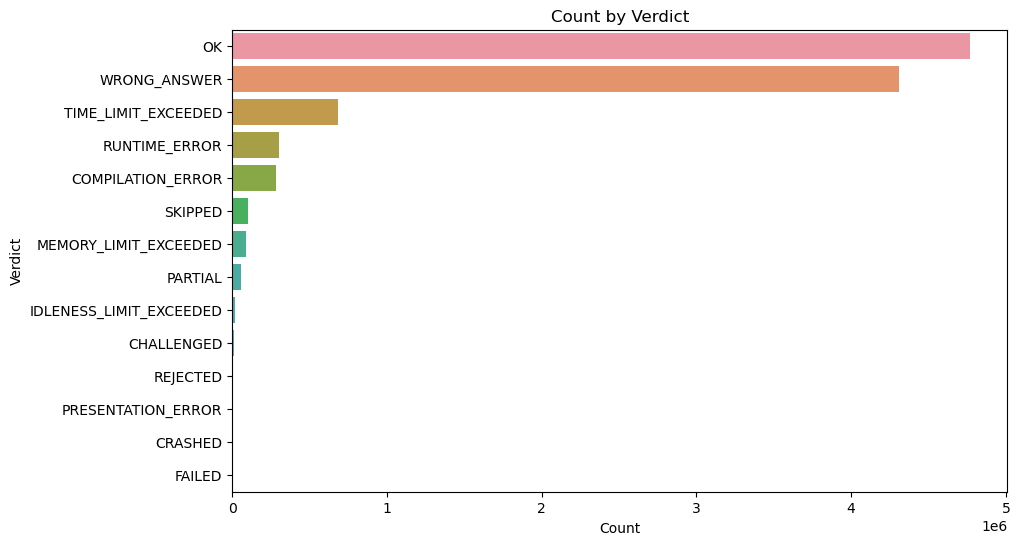

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(y=verdicts.index, x=verdicts.values)
plt.ylabel('Verdict')
plt.xlabel('Count')
plt.title('Count by Verdict')
plt.show()

### User Rating and Submissions Relation

In [155]:
df_users_submissions = df_users.merge(df_submissions, on="handle", how="inner")

In [156]:
df_users_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10502571 entries, 0 to 10502570
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   handle                   object 
 1   email                    object 
 2   vkId                     float64
 3   openId                   object 
 4   firstName                object 
 5   lastName                 object 
 6   country                  object 
 7   city                     object 
 8   organization             object 
 9   contribution             int64  
 10  rank                     object 
 11  userRating               float64
 12  maxRank                  object 
 13  maxRating                float64
 14  lastOnlineTimeSeconds    int64  
 15  registrationTimeSeconds  int64  
 16  friendOfCount            int64  
 17  avatar                   object 
 18  titlePhoto               object 
 19  contestId                float64
 20  index                    object 
 21  points

In [157]:
df_users_submissions.head()

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,...,avatar,titlePhoto,contestId,index,points,problemRating,tags,id,programmingLanguage,verdict
0,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,https://userpic.codeforces.org/3156550/avatar/...,https://userpic.codeforces.org/3156550/title/1...,1987.0,D,1500.0,NaN,"['dp', 'games']",268196673,C++20 (GCC 13-64),WRONG_ANSWER
1,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,https://userpic.codeforces.org/3156550/avatar/...,https://userpic.codeforces.org/3156550/title/1...,1987.0,C,1000.0,NaN,"['dp', 'greedy']",268176116,C++20 (GCC 13-64),OK
2,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,https://userpic.codeforces.org/3156550/avatar/...,https://userpic.codeforces.org/3156550/title/1...,1987.0,C,1000.0,NaN,"['dp', 'greedy']",268168823,C++20 (GCC 13-64),WRONG_ANSWER
3,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,https://userpic.codeforces.org/3156550/avatar/...,https://userpic.codeforces.org/3156550/title/1...,1987.0,B,750.0,NaN,['greedy'],268154093,C++20 (GCC 13-64),OK
4,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,https://userpic.codeforces.org/3156550/avatar/...,https://userpic.codeforces.org/3156550/title/1...,1987.0,A,250.0,NaN,"['greedy', 'math']",268137538,C++20 (GCC 13-64),OK


In [158]:
df_users_submissions['handle'].value_counts()

handle
BlueDiamond             20887
BenjaR                  14663
dreamoon_love_AA        13864
244mhq                  12303
hank55663               12229
                        ...  
DewanganDeeksha             1
harshitpatel28022005        1
gireeshkoshe30              1
GigaCoder15                 1
Arbiswas                    1
Name: count, Length: 25665, dtype: int64

In [159]:
df_active_users = df_users.copy()
df_active_users['submissionCount'] = df_users['handle'].map(df_users_submissions['handle'].value_counts())
df_active_users = df_active_users.dropna(subset=['submissionCount'])

In [160]:
df_active_users[['submissionCount', 'userRating']].corr()

,submissionCount,userRating
submissionCount,1.000000,0.521856
userRating,0.521856,1.000000


In [161]:
df_grouped = df_users_submissions.groupby(['handle', 'problemRating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='handle', columns='problemRating', values='count').fillna(0)
df_pivot.columns = ['submissions'+str(col) if col != 'handle' and col != 'count' else col for col in df_pivot.columns]
df_active_users = df_active_users.join(df_pivot, on='handle')

In [162]:
df_active_users

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,...,submissions2600.0,submissions2700.0,submissions2800.0,submissions2900.0,submissions3000.0,submissions3100.0,submissions3200.0,submissions3300.0,submissions3400.0,submissions3500.0
24,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,---__---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Faculty of Engineering, Ain Shams University",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,--55,NaN,NaN,NaN,SAI,CHARAN,NaN,NaN,IIT Patna,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,--aarchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,--Adharsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248832,hossam_osama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248870,HosSTDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248877,Hostek,NaN,NaN,NaN,NaN,NaN,Poland,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248888,Hosxboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df_submissions_rating = df_active_users.loc[:, 'submissionCount':]
df_submissions_rating['userRating'] = df_active_users['userRating']
df_submissions_rating

,submissionCount,submissions800.0,submissions900.0,submissions1000.0,submissions1100.0,submissions1200.0,submissions1300.0,submissions1400.0,submissions1500.0,submissions1600.0,...,submissions2700.0,submissions2800.0,submissions2900.0,submissions3000.0,submissions3100.0,submissions3200.0,submissions3300.0,submissions3400.0,submissions3500.0,userRating
24,217.0,32.0,7.0,10.0,9.0,17.0,14.0,34.0,16.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0
36,322.0,76.0,20.0,11.0,26.0,20.0,26.0,38.0,7.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1437.0
43,255.0,149.0,42.0,39.0,14.0,8.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.0
44,84.0,50.0,5.0,8.0,8.0,3.0,8.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0
45,81.0,41.0,9.0,2.0,9.0,8.0,3.0,2.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248832,550.0,164.0,46.0,60.0,66.0,57.0,70.0,27.0,27.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1154.0
248870,35.0,15.0,6.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0
248877,731.0,140.0,37.0,38.0,51.0,26.0,55.0,47.0,61.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1504.0
248888,477.0,72.0,6.0,21.0,46.0,24.0,31.0,21.0,93.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0


There is an average correlation - around 0.5 - between a user's rating and the number of submissions on issues in the 1600 to 2000 rating range.

It is also possible to notice a strong correlation between the number of submissions on similar rating problems.

<Axes: >

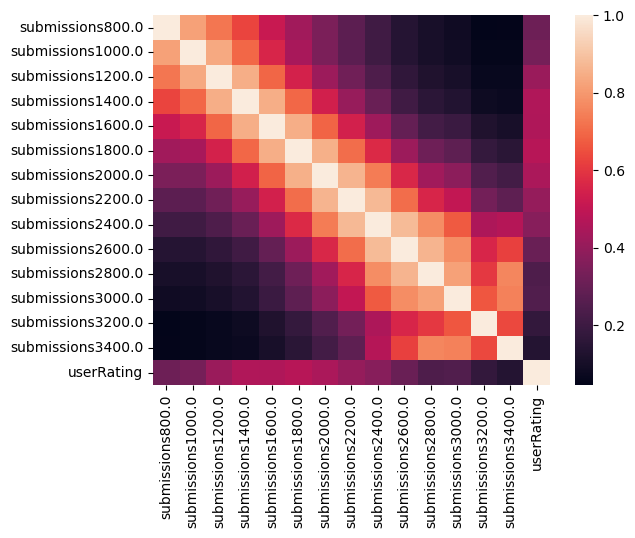

In [164]:
sns.heatmap(df_submissions_rating.loc[:,'submissions800.0'::2].corr())

It is not possible to see a relevant correlation between the account registration time and the number of submissions.

<Axes: >

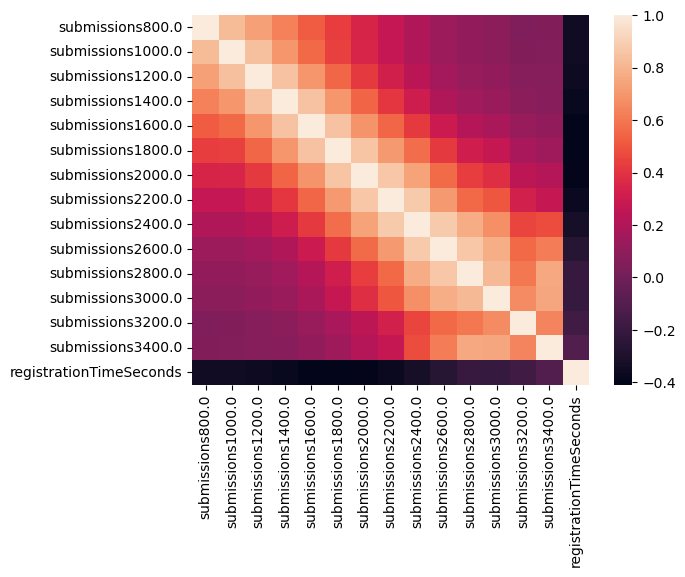

In [165]:
df_sub_registration = df_active_users.loc[:, 'submissionCount':]
df_sub_registration['registrationTimeSeconds'] = df_active_users['registrationTimeSeconds']
df_sub_registration
sns.heatmap(df_sub_registration.loc[:,'submissions800.0'::2].corr())

### User Rating and Accepted Submissions Relation

In [166]:
df_users_ok = df_users_submissions[df_users_submissions['verdict'] == 'OK']
df_users_ok = df_users_ok.drop('verdict', axis=1)

In [167]:
df_active_users['okCount'] = df_users['handle'].map(df_users_ok['handle'].value_counts())

In [168]:
df_active_users[['okCount', 'userRating']].corr()

,okCount,userRating
okCount,1.000000,0.523222
userRating,0.523222,1.000000


In [169]:
df_active_users[['submissionCount', 'okCount']].corr()

,submissionCount,okCount
submissionCount,1.000000,0.962769
okCount,0.962769,1.000000


In [170]:
df_grouped = df_users_ok.groupby(['handle', 'problemRating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='handle', columns='problemRating', values='count').fillna(0)
df_pivot.columns = ['ok'+str(col) if col != 'handle' and col != 'count' else col for col in df_pivot.columns]
df_active_users = df_active_users.join(df_pivot, on='handle')

In [171]:
df_active_users

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,...,ok2600.0,ok2700.0,ok2800.0,ok2900.0,ok3000.0,ok3100.0,ok3200.0,ok3300.0,ok3400.0,ok3500.0
24,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,---__---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Faculty of Engineering, Ain Shams University",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,--55,NaN,NaN,NaN,SAI,CHARAN,NaN,NaN,IIT Patna,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,--aarchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,--Adharsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248832,hossam_osama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248870,HosSTDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248877,Hostek,NaN,NaN,NaN,NaN,NaN,Poland,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248888,Hosxboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
df_ok_rating = df_active_users.loc[:, 'okCount':]
df_ok_rating['userRating'] = df_active_users['userRating']
df_ok_rating

,okCount,ok800.0,ok900.0,ok1000.0,ok1100.0,ok1200.0,ok1300.0,ok1400.0,ok1500.0,ok1600.0,...,ok2700.0,ok2800.0,ok2900.0,ok3000.0,ok3100.0,ok3200.0,ok3300.0,ok3400.0,ok3500.0,userRating
24,114.0,25.0,5.0,8.0,8.0,11.0,11.0,11.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0
36,100.0,44.0,7.0,8.0,10.0,7.0,6.0,6.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1437.0
43,72.0,49.0,10.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.0
44,49.0,33.0,4.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0
45,32.0,22.0,3.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248832,272.0,128.0,22.0,30.0,29.0,16.0,20.0,8.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1154.0
248870,19.0,11.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0
248877,414.0,122.0,18.0,28.0,35.0,20.0,34.0,22.0,26.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1504.0
248888,207.0,54.0,6.0,9.0,13.0,12.0,12.0,9.0,36.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0


The correlation between the number of accepted submissions and user rating is not significantly higher than the correlation between the number of submissions and user rating. This is possibly due to the fact that the two attributes are extremely correlated.

<Axes: >

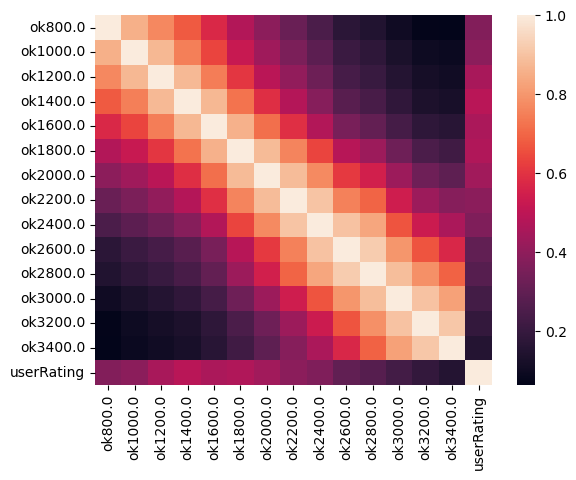

In [173]:
sns.heatmap(df_ok_rating.loc[:,'ok800.0'::2].corr())